<a href="https://colab.research.google.com/github/ooooooowtf/ROSE_HULMAN/blob/master/Homework1YuEx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

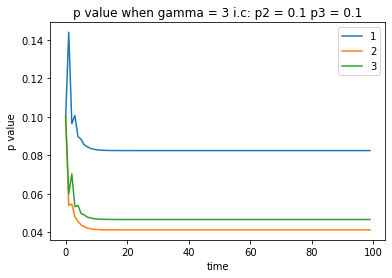

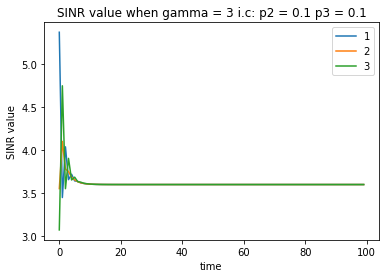

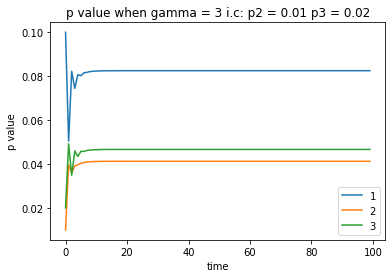

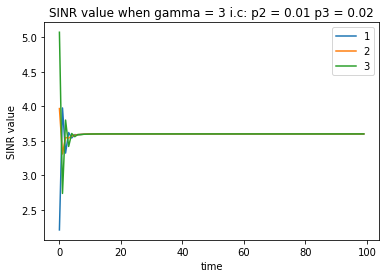

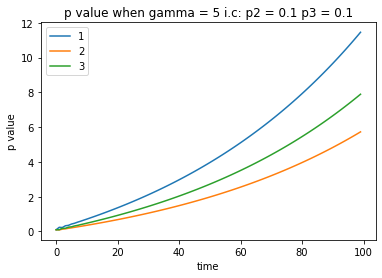

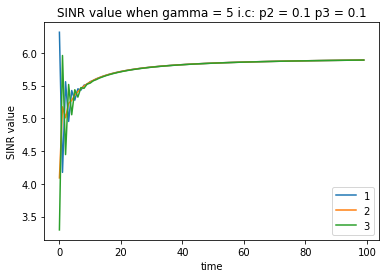

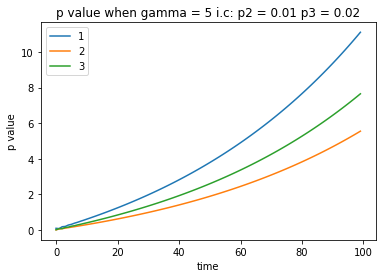

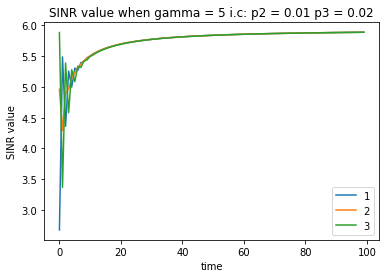

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = np.array([[1.0, 0.2, 0.1],
			  [0.1, 2.0, 0.1],
			  [0.3, 0.1, 3.0]])

# a --> alpha
# g --> gamma
a = 1.2
g = 3
sigma = 0.1
for j in range(2):
  if j == 1:
    g= 5
  A = np.array([[0.0, (a*g*G[0,1])/G[0,0], (a*g*G[0,2])/G[0,0]],
			    [(a*g*G[1,0])/G[1,1], 0.0, (a*g*G[1,2])/G[1,1]],
			    [(a*g*G[2,0])/G[2,2], (a*g*G[2,1])/G[2,2], 0.0]])


  B = np.array([[(a*g)/G[0,0]],
			    [(a*g)/G[1,1]],
			    [(a*g)/G[2,2]]])
  
  
  time = np.zeros(100)
  p = np.zeros((101, 3))
  sinr = np.zeros((100,3))
  
  for k in range(2):
    p[0,0] = 0.1
    p[0,1] = 0.1
    p[0,2] = 0.1
    if k == 1:
      p[0,0] = 0.1
      p[0,1] = 0.01
      p[0,2] = 0.02

    ptemp = A.dot([[p[0,0]],[p[0,1]],[p[0,2]]]) + B*(sigma**2)
    for i in range(100):
      time[i]=i
      p[i+1,0] = ptemp[0]
      p[i+1,1] = ptemp[1]
      p[i+1,2] = ptemp[2]
    
      s = np.array([[G[0,0]*ptemp[0]],
                [G[1,1]*ptemp[1]],
                [G[2,2]*ptemp[2]]])
      q = np.array([[sigma**2+G[0,1]*ptemp[1]+G[0,2]*ptemp[2]],
                [sigma**2+G[1,0]*ptemp[0]+G[1,2]*ptemp[2]],
                [sigma**2+G[2,0]*ptemp[0]+G[2,1]*ptemp[1]]])
      sinr[i,0] = s[0,0]/q[0,0]
      sinr[i,1] = s[1,0]/q[1,0]
      sinr[i,2] = s[2,0]/q[2,0]
      ptemp = A.dot(ptemp) + B*(sigma**2)

       
## Plot the graphs
    plt.figure()

    plt.plot(time,p[:100,0]) 
    plt.plot(time,p[:100,1]) 
    plt.plot(time,p[:100,2]) 
    plt.xlabel("time")
    plt.ylabel("p value") 
    plt.legend('123')
    if j == 1:
      if k == 1:
        plt.title('p value when gamma = 5 i.c: p2 = 0.01 p3 = 0.02')
      else:
        plt.title('p value when gamma = 5 i.c: p2 = 0.1 p3 = 0.1')
    else:
      if k == 1:
        plt.title('p value when gamma = 3 i.c: p2 = 0.01 p3 = 0.02')
      else:
        plt.title('p value when gamma = 3 i.c: p2 = 0.1 p3 = 0.1')
    fig = plt.figure()
    plt.plot(time,sinr[:,0])  
    plt.plot(time,sinr[:,1]) 
    plt.plot(time,sinr[:,2]) 
    plt.xlabel("time")
    plt.ylabel("SINR value")
    plt.legend('123')
    if j == 1:
      if k == 1:
        plt.title('SINR value when gamma = 5 i.c: p2 = 0.01 p3 = 0.02')
      else:
        plt.title('SINR value when gamma = 5 i.c: p2 = 0.1 p3 = 0.1')
    else:
      if k == 1:
        plt.title('SINR value when gamma = 3 i.c: p2 = 0.01 p3 = 0.02')
      else:
        plt.title('SINR value when gamma = 3 i.c: p2 = 0.1 p3 = 0.1')

##RESULT
# the controller fails to achieve the goal when gamma = 5 
# but reach 6 (gamma*alpha) when gamma = 3